In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydotplus
%matplotlib inline

In [39]:
df=pd.read_csv(r'H:\Rupa\GitHub\Datascience\bostoncsv\Boston.csv')

In [40]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


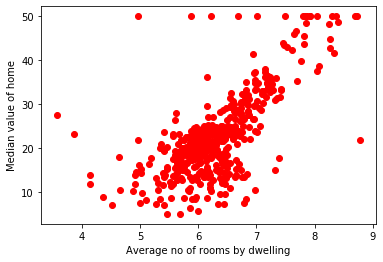

In [41]:
plt.scatter(x=df['rm'], y=df['medv'], color='red')
plt.xlabel('Average no of rooms by dwelling')
plt.ylabel('Median value of home')
plt.show()

In [42]:
X=pd.DataFrame(df['rm'])
y=pd.DataFrame(df['medv'])

In [43]:
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [44]:
regressor=DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
export_graphviz(regressor, out_file='reg_tree.dot')

After executing this step, the ‘reg_tree.dot’ file will be saved in your system. Now to visualize the tree, open this file with the ‘.dot’ extension.
Now, copy the graphviz data, go to the site ‘http://www.webgraphviz.com/’ and paste the Graphviz data there, as shown below:

In [51]:
y_pred=regressor.predict(x_test)

In [52]:
print(y_pred[4:9])
print(y_test[4:9])

[19.74248705 16.13023256 19.74248705 19.74248705 16.13023256]
     medv
78   21.2
15   19.9
487  20.6
340  18.7
310  16.1


In [56]:
mse=metrics.mean_squared_error(y_pred, y_test)
rmse=np.sqrt(mse)
rmse

6.551166704025365